# Wine Quality Classification

## Introduction

This tutorial will introduce you some basic methods for data visualizition, feature engineering and classification algorithms. We will focus on wine quality data. The dataset we use is from UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.
Finally, we are able to predict wine quality (whether it's good or not) based on the given attributes.

### Tutorial content

In this tutorial, we will show how to do some basic machine learnining algorithm to classify wine into 'good quality' or 'bad quality'.

We will cover the following topics in this tutorial:
- Installing the libraries
- Loading data and plotting
- Classification algorithms
- Output and analysis

### Installing the libraries

Before getting started, you will need to install the various libraries that we will use. 

In [236]:
import pandas as pd
import numpy as np

### Loading data and plotting

We download the "winequality-red.csv" file from the UCI machine learning repository website: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv. Then we copy the file to be in the same directory as this notebook.

In [237]:
df = pd.read_csv("winequality-red.csv") 

In [238]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We take a further look into the dataset by plotting the attributes for each data point.

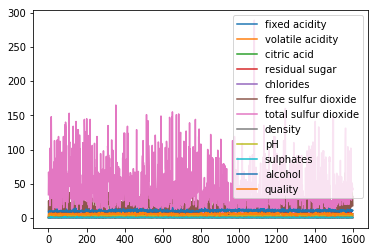

In [239]:
p2 = df.plot()

### Feature Engineering

Then we need to choose features that affect the wine quality the most. We are going to use RandomForest algorithm to realize this goal. Random forests are an learning method for classification, regression and other tasks. To learn more about the algorithm, please refer to
https://en.wikipedia.org/wiki/Random_forest.

We are going to use scikit-learn to implement the RandomForest.

In [240]:
from sklearn.ensemble import RandomForestClassifier
features = np.array(['fixed acidity','volatile acidity','citric acid',
                     'residual sugar','chlorides','free sulfur dioxide',
                     'total sulfur dioxide','density','pH','sulphates','alcohol'])
clf = RandomForestClassifier()
clf.fit(df[features], df['quality'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

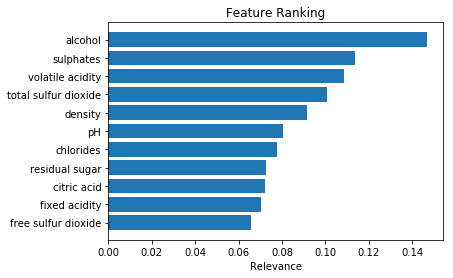

In [241]:
import matplotlib.pyplot as plt
%matplotlib inline

relevance = clf.feature_importances_
idx = np.argsort(relevance)
padding = np.arange(len(features)) + 0.5
plt.barh(padding, relevance[idx], align='center')
plt.yticks(padding, features[idx])
plt.xlabel("Relevance")
plt.title("Feature Ranking")
plt.show()

From the plot above, we can see that the most relevant features are alcohol, sulphates, volatile acidity, and total sulfur dioxide. Features such as free sulfur dioxide and pH are not that relevant to the wine quality.

We can take a further look into the relationship of alcohol, volatile acidity and sulphates against wine quality by plotting the variables for each data point.

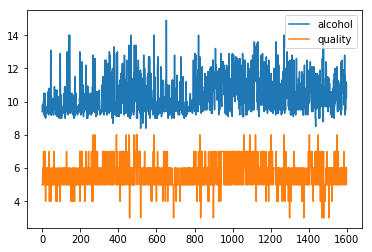

In [242]:
x = df['alcohol'].tolist()
y = df['quality'].tolist()
data = {'alcohol': x,
     'quality': y}
df2 = pd.DataFrame(data)
p = df2.plot()

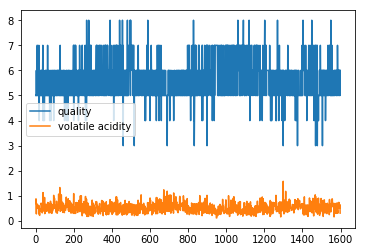

In [244]:
x = df['volatile acidity'].tolist()
y = df['quality'].tolist()
data = {'volatile acidity': x,
     'quality': y}
df2 = pd.DataFrame(data)
p = df2.plot()

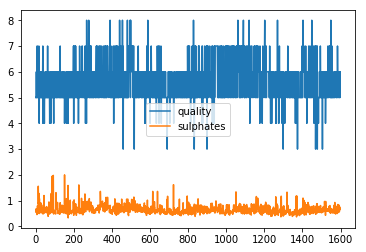

In [245]:
x = df['sulphates'].tolist()
y = df['quality'].tolist()
data = {'sulphates': x,
     'quality': y}
df2 = pd.DataFrame(data)
p = df2.plot()

### Data Preprocessing

Then we need to convert the value of the wine quality attribute to 'good' or 'bad' in order to perform classification algorithm. 

First, we calculate the minimum, maximum, mean and median of the values of wine quality to get a sense of which scores can be categorized as good qualities.

In [246]:
df['quality'].min()

3

In [247]:
df['quality'].max()

8

In [248]:
df['quality'].mean()

5.6360225140712945

In [249]:
df['quality'].median()

6.0

So one way to categorize the wine into binary group based on the quality is to categorize wine with quality value smaller than or equal to the median as bad quality and to categorize wine with quality value larger than median as good quality. We can do that using the 'cut' method in the Pandas Library.

In [250]:
df['quality'] = pd.cut(df['quality'], (2.5,6.5,8), labels=["bad", "good"])

The first five lines after doing the preprocessing of the label is the showed in the table below. We could see that wine with quality value 5 is now categorized as bad quality.

In [251]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Then we drop out the features which are not so important compared to others. From the feature engineering section, we know that pH, citric acid, and free sulfur dioxide have low rank in relevance to the wine quality, so we are going to drop these three features. 

In [252]:
X = df.drop('pH', axis = 1)
X = X.drop('citric acid', axis = 1)
X = X.drop('free sulfur dioxide', axis = 1)

In [253]:
X.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,2.6,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,2.3,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,1.9,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,1.9,0.076,34.0,0.9978,0.56,9.4,bad


Before we perform classification algorithm on our dataset, we need to separate the attributes and the label.  

In [254]:
X = X.drop('quality', axis = 1)
y = df['quality']

Then we need to split the dataset into training set and test set before we perform classifiction algorithms. We use train_test_split helper function in sklearn library to randomly split the dataset set. In the following lines, we import the library and split the dataset into 60% training data and 40% test data.

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
 X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.4, random_state=0)

In [257]:
#X_train, X_validate, X_test = np.split(X.sample(frac=1), [int(0.6*len(X)), int(0.8*len(X))])
#y_train, y_validate, y_test = np.split(y.sample(frac=1), [int(0.6*len(y)), int(0.8*len(y))])

Finally, we need to scale the attributes. This step is important because without taking this step, some features may have a wide range of values, and therefore take over other features' importance on the classification result. By normalizaing the features, the impact of each feature on the result would be more likely to be proportional to its actual relevance to the
result. There are several scalers we can use:
- StandardScaler
- MinMaxScaler
- MaxAbsScaler
- RobustScaler
etc.

First, we are going to apply StandardScalar which standardizes features by removing the mean and scaling to unit variance. We use sklearn library StandardScalar. 

In [258]:
from sklearn.preprocessing import StandardScaler

In [259]:
scaler = StandardScaler()

In [260]:
temp1 = X_train
temp2 = X_test

In [261]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Then we use MinMaxScaler to standardize features and generate new training set and test set. We can compare the    performance of these two scalers later.   

In [262]:
from sklearn.preprocessing import MinMaxScaler

In [263]:
scaler2 = MinMaxScaler()

In [264]:
X_train2 = scaler2.fit_transform(temp1)
X_test2 = scaler2.fit_transform(temp2)

### Classification Algorithms

Now we can perform classification algorithm on our wine dataset. We are going to perform 
several classification algorithms and compare the their performance.            

The classification algorithms we are going to use:
- support vector machine (SVM)
- Multi-layer Perceptron classifier (MLP)
- SGD classifier
- Decision Tree

First of all, we train and fit the model based on sklearn SVM. Then calculate score using the test set. The scores we get for the models based on both scalers are about 88-90%. The model scaled by MinMaxScaler has a slightly better performance. To learn more about SVM, please refer to http://www.statsoft.com/Textbook/Support-Vector-Machines.

In [265]:
from sklearn import svm

In [266]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8796875

In [267]:
clf2 = svm.SVC(kernel='linear', C=1).fit(X_train2, y_train)
clf2.score(X_test2, y_test)

0.896875

Then, we implement the MLPClassifier which has 50 hidden units, and uses stochastic gradient descent (SGD) to update the parameters of the objective function. We set the maximum number of iterations to be 100. To learn more about MLP, please refer to http://scikit-learn.org/stable/modules/neural_networks_supervised.html. To learn more about stochastic gradient descent, please refer to http://scikit-learn.org/stable/modules/sgd.html.

In [268]:
from sklearn.neural_network import MLPClassifier

In [269]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=80, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

Iteration 1, loss = 0.56188079
Iteration 2, loss = 0.37915507
Iteration 3, loss = 0.31977256
Iteration 4, loss = 0.29316816
Iteration 5, loss = 0.28941080
Iteration 6, loss = 0.28298497
Iteration 7, loss = 0.28026642
Iteration 8, loss = 0.27664653
Iteration 9, loss = 0.27362688
Iteration 10, loss = 0.27120615
Iteration 11, loss = 0.27034494
Iteration 12, loss = 0.26742114
Iteration 13, loss = 0.26635317
Iteration 14, loss = 0.26509477
Iteration 15, loss = 0.26397231
Iteration 16, loss = 0.26351863
Iteration 17, loss = 0.26199793
Iteration 18, loss = 0.26096685
Iteration 19, loss = 0.26009051
Iteration 20, loss = 0.25978640
Iteration 21, loss = 0.25919729
Iteration 22, loss = 0.25743412
Iteration 23, loss = 0.25696892
Iteration 24, loss = 0.25583268
Iteration 25, loss = 0.25467297
Iteration 26, loss = 0.25388040
Iteration 27, loss = 0.25349928
Iteration 28, loss = 0.25268283
Iteration 29, loss = 0.25223779
Iteration 30, loss = 0.25264445
Iteration 31, loss = 0.24990331
Iteration 32, los

0.8828125

In [270]:
mlp.fit(X_train2, y_train)
mlp.score(X_test2, y_test)

Iteration 1, loss = 0.56786347
Iteration 2, loss = 0.43915574
Iteration 3, loss = 0.44835248
Iteration 4, loss = 0.42751679
Iteration 5, loss = 0.41148089
Iteration 6, loss = 0.40552256
Iteration 7, loss = 0.39508168
Iteration 8, loss = 0.38495468
Iteration 9, loss = 0.37367880
Iteration 10, loss = 0.36288753
Iteration 11, loss = 0.35124142
Iteration 12, loss = 0.33968862
Iteration 13, loss = 0.32861042
Iteration 14, loss = 0.31953869
Iteration 15, loss = 0.31203648
Iteration 16, loss = 0.30560200
Iteration 17, loss = 0.30003744
Iteration 18, loss = 0.29763128
Iteration 19, loss = 0.29488835
Iteration 20, loss = 0.29084272
Iteration 21, loss = 0.29021414
Iteration 22, loss = 0.28847572
Iteration 23, loss = 0.28768719
Iteration 24, loss = 0.28596345
Iteration 25, loss = 0.28547379
Iteration 26, loss = 0.28491396
Iteration 27, loss = 0.28459570
Iteration 28, loss = 0.28564175
Iteration 29, loss = 0.28341766
Iteration 30, loss = 0.28384752
Iteration 31, loss = 0.28178787
Iteration 32, los

0.86875

The accuracy we get on the test data for our multi-layer perceptron classifier model is about 87-88%. The model scaled by StandardScaler has a slightly better performance.

Next, we apply SGD classifer to classify the wine quality. We use soft-margin linear support vector machine as the loss function and apply L2 regularization as the penalty for the classification.

In [271]:
from sklearn.linear_model import SGDClassifier

In [272]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)

In [273]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [274]:
sgd.score(X_test, y_test)

0.859375

In [275]:
sgd.fit(X_train2, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=100, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [276]:
sgd.score(X_test2, y_test)

0.8671875

The accuracy we get for our stochastic gradient descent model is approximately 86-87%.

Finally, we use decision tree classifier to perform classification on our wine dataset.

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dt = DecisionTreeClassifier(random_state=6)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.859375

In [296]:
dt2 = DecisionTreeClassifier(random_state=7)
dt2.fit(X_train2, y_train)
dt2.score(X_test2, y_test)

0.8296875

If we set the RandomState instance to be 6, the accuracy we get for our decision tree model is approximately 86% for StandardScaler and approximately 83% for MinMaxScaler.

### Evaluating the Performance

Now we are going to use cross-validation to estimate the accuracy of our model. We use cross_val_score to split the dataset, fit the model and compute the score 5 times. The accuracy for each split is displayed below.            

In [281]:
from sklearn.model_selection import cross_val_score

In [282]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.8642935966171544

So we can see that the accuracy for our SVM is approximately 86%. 

Similarily, we use cross-validation to estimate the accuracy for our decision tree model. The accuracy we get after   computing the score 10 times is approximately 86%.

In [283]:
dt = DecisionTreeClassifier(random_state=6)
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.8642981659439822

Using the same method, we estimate the accuracy for our SGD classifer. The accuracy we get is around 81%.

In [284]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
scores = cross_val_score(sgd, X, y, cv=20)
scores.mean()

0.8141762384747617

Similarly, the accuracy for multi-layer perceptron classifier model is around 86%.

In [285]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=80, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
scores = cross_val_score(mlp, X, y, cv=10)
scores.mean()

Iteration 1, loss = 3.25918393
Iteration 2, loss = 0.43512985
Iteration 3, loss = 0.39782026
Iteration 4, loss = 0.39863581
Iteration 5, loss = 0.39676409
Iteration 6, loss = 0.39883975
Iteration 7, loss = 0.39909641
Iteration 8, loss = 0.39966431
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.15950700
Iteration 2, loss = 0.39760664
Iteration 3, loss = 0.41603681
Iteration 4, loss = 0.38947199
Iteration 5, loss = 0.39024360
Iteration 6, loss = 0.40443593
Iteration 7, loss = 0.40053076
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 9.02066679
Iteration 2, loss = 0.40019019
Iteration 3, loss = 0.40984443
Iteration 4, loss = 0.40885464
Iteration 5, loss = 0.40685156
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 9.01967377
Iteration 2, loss = 0.40416917
Iteration 3, loss = 0.40938647
Iteration 4, l

0.8642981659439822

### Summary and  reference

This tutorial introduces some basic approaches to do data visualizition, feature engineering and classification algorithms. Much more details can be found in the following links.

http://blog.yhat.com/tutorials/5-Feature-Engineering.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://en.wikipedia.org/wiki/Feature_scaling

http://scikit-learn.org/stable/modules/cross_validation.html

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier